In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [25]:
def pps(n,ND) :
    P=n*100/ND
    PP= "{:.2f}".format(P)
    print("\r",end="")
    print("processes",PP,"% completed:   ",end="")
    i=50*n/ND
    a=50-int(i)
    b=(int(i)+1)*"🟩"
    c=(a-1)*"⬜️"
    print(b,end="")
    print(c, end="")
    if n==ND:
        print("\r","computing successfully completed!   ",50*"🟦")

In [26]:
def initial_condition(I0):
    G=nx.read_gpickle('Graph.gpickle')
    for n_0 in G.nodes:
        G.nodes[n_0]['x']='s'
        G.nodes[n_0]['tpe']= 0
        G.nodes[n_0]['tpq']= 0
        G.nodes[n_0]['Q']=False
        if random.random()<I0:
            G.nodes[n_0]['x']='i'
    return G

In [27]:
def Count_nodes(Graph):
    inode=[]
    rnode=[]
    for n_1 in Graph.nodes:
        if Graph.nodes[n_1]['x']=='i':
            inode.append(n_1)
        if Graph.nodes[n_1]['x']=='r':
            rnode.append(n_1)
    return (inode,len(rnode))

In [28]:
def SEIR_dynamic(I0,beta,gamma,t_e,t_q,P2):

    G = initial_condition(I0)
    rlist=[]

    while len(rlist)<20 or rlist[-1]!=rlist[-4]:

        (inode,rnum)= Count_nodes(Graph=G)
        rlist.append(rnum)

        for i in G.nodes:
            if G.nodes[i]['x']=='e':
                if G.nodes[i]['tpe']>=np.random.poisson(t_e,size=1)[0]:
                    G.nodes[i]['x']='i'
                else:
                    G.nodes[i]['tpe']+=1
            if G.nodes[i]['Q']==True :
                if G.nodes[i]['tpq']>=np.random.poisson(t_q,size=1)[0]:
                    G.nodes[i]['Q']=False
                else:
                    G.nodes[i]['tpq']+=1
            if i in inode and G.nodes[i]['x']=='i':
                for n_5 in G.adj[i]:
                    if ((G.nodes[n_5]['x']=='s') and (random.random()<P2)):
                        G.nodes[n_5]['Q']=True
                        G.nodes[n_5]['tpq']=0
                    if G.nodes[n_5]['x']=='s':
                        if ((G.nodes[i]['Q']==False) and (random.random()<beta)):
                            G.nodes[n_5]['x']='e'
                        if ((G.nodes[i]['Q']==True) and (random.random()<beta*0.5)):
                            G.nodes[n_5]['x']='e'
                if random.random()<gamma:
                    G.nodes[i]['x']='r'
                    G.nodes[i]['Q']=False

    return rnum

In [29]:
a=time.time()
data=SEIR_dynamic(I0= 0.01,beta= 0.5,gamma= 1,t_e= 5,t_q= 6,P2= 0.5)
b=time.time()
b-a

0.35303211212158203

In [30]:
P2_list=np.linspace(0,1,100)
beta_list=np.linspace(0,1,100)
rdata= np.zeros((100,100,50))
rmean= np.zeros((100,100))

n=0
for p in P2_list:
    m=0
    for b in beta_list:
        for i in range(50):
            rdata[n][m][i]=SEIR_dynamic(I0= 0.01,beta= b,gamma= 1,t_e= 5,t_q= 6,P2= p)
        rmean[n][m]=np.mean(rdata[n][m])
        m+=1
    n+=1
    pps(n,100)

 computing successfully completed!    🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦


<ipython-input-32-804e1e429ee5>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c=plt.pcolormesh(beta_list,P2_list,rmean)


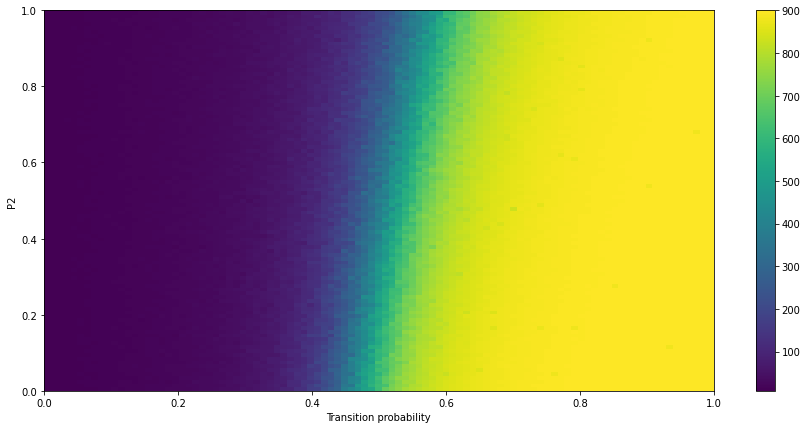

In [32]:
plt.figure(figsize=(15,7))
c=plt.pcolormesh(beta_list,P2_list,rmean)
plt.ylabel('P2')
plt.xlabel('Transition probability')
plt.colorbar(c)
plt.savefig('Fig2-2')

In [33]:
np.save('2-2-(100-100-50).npy',rdata)